In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [45]:
sales_data = pd.read_csv("D:\ExcelR\Assigments\Decision_Trees\Company_Data.csv")
sales_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
sales_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [4]:
sales_data.shape

(400, 11)

In [5]:
sales_data.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [47]:
sales_data['ShelveLoc']=le.fit_transform(sales_data['ShelveLoc'])
sales_data['Urban']=le.fit_transform(sales_data['Urban'])
sales_data['US']=le.fit_transform(sales_data['US'])

In [48]:
sales_data.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc        int32
Age              int64
Education        int64
Urban            int32
US               int32
dtype: object

In [9]:
sales_data.insert(11,'sales_category','')

In [49]:
sales_data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


In [11]:
for i in range(0,len(sales_data['Sales']),1):
    if sales_data['Sales'][i]>=11.0:
        sales_data['sales_category'][i]='high'
    elif sales_data['Sales'][i]<=6.0:
        sales_data['sales_category'][i]='low'
    else:
        sales_data['sales_category'][i]='medium'   

In [12]:
sales_data.head(8)

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales_category
0,9.50,138,73,11,276,120,0,42,17,1,1,medium
1,11.22,111,48,16,260,83,1,65,10,1,1,high
2,10.06,113,35,10,269,80,2,59,12,1,1,medium
3,7.40,117,100,4,466,97,2,55,14,1,1,medium
4,4.15,141,64,3,340,128,0,38,13,1,0,low
5,10.81,124,113,13,501,72,0,78,16,0,1,medium
6,6.63,115,105,0,45,108,2,71,15,1,0,medium
7,11.85,136,81,15,425,120,1,67,10,1,1,high


In [13]:
x = sales_data.iloc[:,1:11]
y = sales_data['sales_category']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size=0.2)

In [15]:
from sklearn.tree import DecisionTreeClassifier

In [16]:
dt = DecisionTreeClassifier()

In [17]:
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)

In [18]:
y_pred

array(['low', 'medium', 'high', 'medium', 'high', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'high', 'medium', 'low', 'medium', 'low', 'medium',
       'low', 'low', 'medium', 'low', 'medium', 'medium', 'low', 'low',
       'medium', 'low', 'medium', 'medium', 'low', 'low', 'medium',
       'high', 'low', 'low', 'medium', 'medium', 'low', 'medium',
       'medium', 'low', 'medium', 'medium', 'medium', 'low', 'high',
       'medium', 'medium', 'low', 'low', 'medium', 'high', 'medium',
       'medium', 'medium', 'medium', 'medium', 'low', 'medium', 'high',
       'medium', 'medium', 'low', 'medium', 'low', 'low', 'high',
       'medium', 'low', 'low', 'medium', 'medium', 'high', 'high', 'low',
       'low', 'high'], dtype=object)

In [19]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [20]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        high       0.55      0.50      0.52        12
         low       0.77      0.77      0.77        26
      medium       0.72      0.74      0.73        42

    accuracy                           0.71        80
   macro avg       0.68      0.67      0.67        80
weighted avg       0.71      0.71      0.71        80



In [21]:
print(accuracy_score(y_test,y_pred))

0.7125


In [22]:
print(confusion_matrix(y_test,y_pred))

[[ 6  0  6]
 [ 0 20  6]
 [ 5  6 31]]


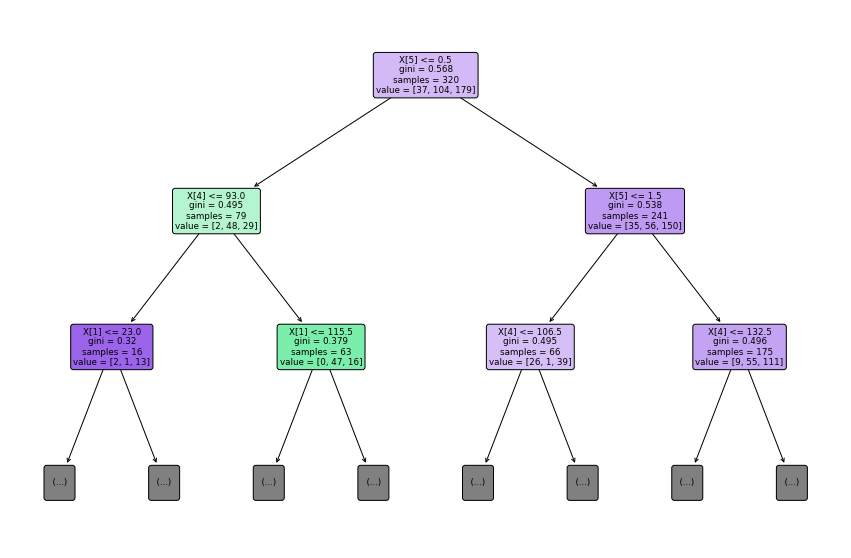

In [23]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,rounded=True,filled=True,max_depth=2)
plt.show()

In [24]:
from sklearn.model_selection import GridSearchCV
gr_model = GridSearchCV(estimator=dt,param_grid={'criterion':['entropy','gini'],
                                                       'max_depth':[2,4,8,10],
                                                        'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4]})
gr_model.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 8, 10],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 4, 6, 8]})

In [25]:
print(gr_model.best_params_)
print(gr_model.best_score_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.653125


In [26]:
dt_newmodel = DecisionTreeClassifier(criterion= 'entropy',max_depth=10, min_samples_leaf=1, min_samples_split= 2)
dt_newmodel.fit(x_train,y_train)
y_predn = dt_newmodel.predict(x_test)
print(accuracy_score(y_test,y_predn))

0.625


In [50]:
feature_dt = x_train.columns
len(feature_dt)

10

In [51]:
imp_feature_dt = dt.feature_importances_
len(imp_feature_dt)

10

In [52]:
data_dt=pd.DataFrame({'feature':feature_dt,'imp_feature':imp_feature_dt})
data_dt=data_dt.sort_values('imp_feature')

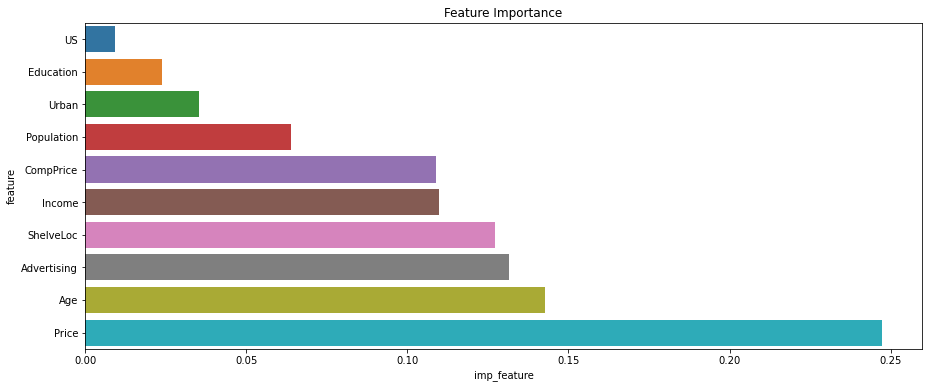

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_dt)
plt.show()

In [54]:
from sklearn.feature_selection import SelectFromModel

In [55]:
selctr=SelectFromModel(estimator=DecisionTreeClassifier())
selctr.fit(x_train,y_train)

SelectFromModel(estimator=DecisionTreeClassifier())

In [56]:
selctr.get_support()

array([ True,  True,  True, False,  True,  True,  True, False, False,
       False])

In [57]:
len(x_train.columns)

10

In [58]:
feature = x_train.columns[selctr.get_support()]

In [59]:
len(feature)

6

In [60]:
x_train_dt=selctr.transform(x_train)
x_test_dt=selctr.transform(x_test)

In [61]:
dt_model_imp=DecisionTreeClassifier().fit(x_train_dt,y_train)
y_pred_imp=dt_model_imp.predict(x_test_dt)

In [62]:
print(accuracy_score(y_test,y_pred_imp))

0.7375


In [63]:
print(confusion_matrix(y_test,y_pred_imp))

[[ 7  0  5]
 [ 0 20  6]
 [ 5  5 32]]


In [64]:
print(classification_report(y_test,y_pred_imp))

              precision    recall  f1-score   support

        high       0.58      0.58      0.58        12
         low       0.80      0.77      0.78        26
      medium       0.74      0.76      0.75        42

    accuracy                           0.74        80
   macro avg       0.71      0.70      0.71        80
weighted avg       0.74      0.74      0.74        80



In [65]:
imp_feature=dt_model_imp.feature_importances_
imp_feature

array([0.135827  , 0.16797861, 0.13526919, 0.27280298, 0.12713212,
       0.16099009])

In [66]:
data_imp=pd.DataFrame({'feature':feature,'imp_feature':imp_feature})
data_imp=data_imp.sort_values('imp_feature')

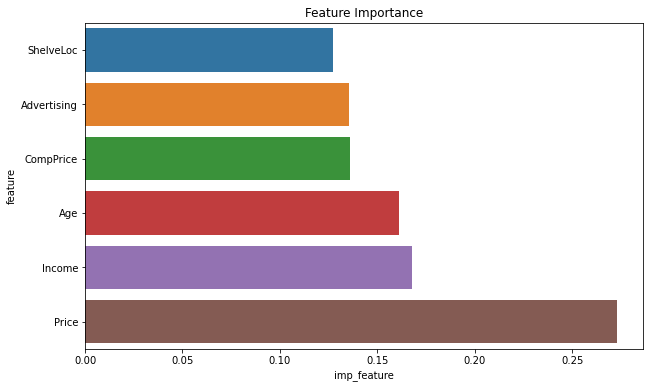

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_imp)
plt.show()

In [68]:
from sklearn.feature_selection import RFE

In [69]:
selector_rfe=RFE(DecisionTreeClassifier())
selector_rfe.fit(x_train,y_train)

RFE(estimator=DecisionTreeClassifier())

In [70]:
selector_rfe.get_support()

array([ True,  True, False, False,  True,  True,  True, False, False,
       False])

In [71]:
feature_rfe=x_train.columns[selector_rfe.get_support()]
feature_rfe

Index(['CompPrice', 'Income', 'Price', 'ShelveLoc', 'Age'], dtype='object')

In [72]:
len(x_train.columns[selector_rfe.get_support()])

5

In [73]:
x_train_rfe=selector_rfe.transform(x_train)
x_test_rfe=selector_rfe.transform(x_test)

In [74]:
dt_model_rfe=DecisionTreeClassifier().fit(x_train_rfe,y_train)

In [75]:
y_pred_rfe=dt_model_rfe.predict(x_test_rfe)

In [76]:
print(accuracy_score(y_test,y_pred_rfe))

0.7


In [77]:
print(confusion_matrix(y_test,y_pred_rfe))

[[ 8  0  4]
 [ 0 20  6]
 [ 6  8 28]]


In [78]:
print(classification_report(y_test,y_pred_rfe))

              precision    recall  f1-score   support

        high       0.57      0.67      0.62        12
         low       0.71      0.77      0.74        26
      medium       0.74      0.67      0.70        42

    accuracy                           0.70        80
   macro avg       0.67      0.70      0.69        80
weighted avg       0.70      0.70      0.70        80



In [79]:
imp_feature_rfe=dt_model_rfe.feature_importances_

In [80]:
data_rfe=pd.DataFrame({'feature':feature_rfe,'imp_feature':imp_feature_rfe})
data_rfe=data_rfe.sort_values('imp_feature')

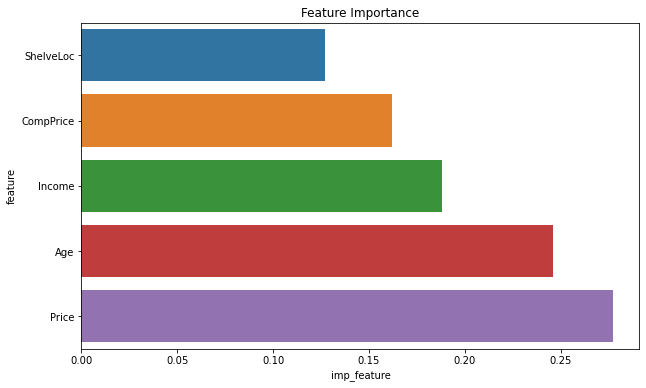

In [81]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(y='feature', x='imp_feature', data=data_rfe)
plt.show()